# Contributions of individual innovators over time
Natalia Vélez, February 2021

In [4]:
%matplotlib inline

import os,re
from os.path import join as opj
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('talk')

## Load data

Discoveries by family:

In [5]:
discovery_data = pd.read_csv('../3_technology/outputs/family_discoveries.tsv', sep='\t')
discovery_data['avatar'] = discovery_data['avatar'].astype(np.int)

print(discovery_data.shape)
discovery_data.head()

(2242779, 6)


,seed,family,avatar,object_id,t_epoch,count
0,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,236,1.573896e+09,1
1,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,134,1.573896e+09,2
2,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2873,1.573896e+09,3
3,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2742,1.573896e+09,4
4,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2861,1.573896e+09,5


Family generations:

In [17]:
gen_data = pd.read_csv('../2_demographics/outputs/family_generations.tsv', sep='\t')
gen_data = gen_data[['family', 'avatar', 'gen']]

print(gen_data.shape)
gen_data.head()

(471336, 3)


,family,avatar,gen
0,time-1584155688_eve-2783193_name-JESUS,2783193,0
1,time-1584155688_eve-2783193_name-JESUS,2783246,1
2,time-1584155688_eve-2783193_name-JESUS,2783231,1
3,time-1584155688_eve-2783193_name-JESUS,2783221,1
4,time-1584155688_eve-2783193_name-JESUS,2783313,2


Remove singleton families (Eve died out with no descendants):

,family,gen
0,time-1573253679_eve-2251043_name-MCCRACKEN,2
1,time-1573253705_eve-2251049_name-FINCH,1
2,time-1573253707_eve-2251051_name-SORROWS,1
3,time-1573253710_eve-2251053_name-LION,3
4,time-1573253711_eve-2251054_name-DEADRICK,6
...,...,...
4141,time-1599447278_eve-3308179_name-MATSU,10
4142,time-1599449578_eve-3308247_name-YELLOW,2
4143,time-1599454213_eve-3308371_name-LUNA,6
4144,time-1599456178_eve-3308427_name-MORALES,2


Merge dataframes:

In [22]:
gen_discoveries = pd.merge(discovery_data, gen_data, on=['avatar','family'])

print(gen_discoveries.shape)
gen_discoveries.head()

(2029427, 7)


,seed,family,avatar,object_id,t_epoch,count,gen
0,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,236,1.573896e+09,1,0
1,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,134,1.573896e+09,2,0
2,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2873,1.573896e+09,3,0
3,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2742,1.573896e+09,4,0
4,1573895673,time-1573895755_eve-2276905_name-ZABICKI,2276905,2861,1.573896e+09,5,0


## Summary statistics

### # discoveries

In [28]:
n_discoveries = gen_discoveries.groupby('family')['count'].agg('count').reset_index()
n_discoveries

,family,count
0,time-1573895755_eve-2276905_name-ZABICKI,311
1,time-1573895904_eve-2276911_name-ROHRER,44
2,time-1573896101_eve-2276917_name-BADA,349
3,time-1573896134_eve-2276919_name-SARINA,476
4,time-1573896495_eve-2276927_name-LISSADE,1074
...,...,...
4009,time-1599447278_eve-3308179_name-MATSU,901
4010,time-1599449578_eve-3308247_name-YELLOW,203
4011,time-1599454213_eve-3308371_name-LUNA,661
4012,time-1599456178_eve-3308427_name-MORALES,157


[Text(0.5, 0, 'Repertoire size'),
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '100'),
  Text(3, 0, '1000'),
  Text(4, 0, '10000')]]

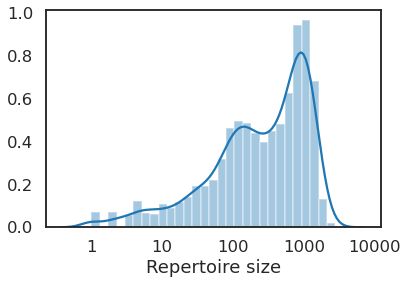

In [49]:
ax = sns.distplot(np.log10(n_discoveries['count']))
ax.set(xlabel='Repertoire size', xticks = range(5), xticklabels=[10**i for i in range(5)])

### # generations

In [42]:
n_gen = gen_data.groupby('family')['gen'].agg('max').reset_index()
n_gen

,family,gen
0,time-1573253679_eve-2251043_name-MCCRACKEN,2
1,time-1573253705_eve-2251049_name-FINCH,1
2,time-1573253707_eve-2251051_name-SORROWS,1
3,time-1573253710_eve-2251053_name-LION,3
4,time-1573253711_eve-2251054_name-DEADRICK,6
...,...,...
4141,time-1599447278_eve-3308179_name-MATSU,10
4142,time-1599449578_eve-3308247_name-YELLOW,2
4143,time-1599454213_eve-3308371_name-LUNA,6
4144,time-1599456178_eve-3308427_name-MORALES,2


[Text(0.5, 0, '# Generations'),
 [Text(0, 0, '1'), Text(1, 0, '10'), Text(2, 0, '100')]]

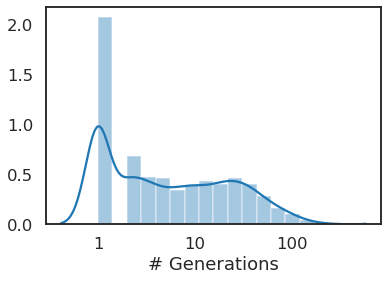

In [50]:
ax = sns.distplot(np.log10(n_gen['gen']))
ax.set(xlabel='# Generations', xticks = range(3), xticklabels=[10**i for i in range(3)])

In [ ]:
sns.jointplot(np.log10(n_gen['gen']), np.log10(n_discoveries['count']))

ValueError: operands could not be broadcast together with shapes (4146,) (4014,) 